# Exploratory Data Analysis

## Imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re

## Access Files 

### Rosenthal Folder

In [19]:
print("Current directory:",os.getcwd())

Current directory: /mnt/rds/redhen/gallina/home/hxm471/RedHenLab-Multimodal_TV_Show_Segmentation/mtvss/notebooks


In [20]:
# Check if the Rosenthal directory exists and is not empty
ros_path = "/mnt/rds/redhen/gallina/Rosenthal/"
print(os.path.isdir(ros_path))

ros_items = os.listdir(ros_path)
print(ros_items)
if len(ros_items)==0:
    print("Error! Directory is empty")

True
['1972', '1978', '1985', '1961', '1982', '2006', '1975', '1971', '1962', '1981', '1976', '1974', '1983', '1960', '1984', '1979', '1973', '1977', '1980', '1969', '1963']


In [47]:
# Starting index of the file name (used to remove path info)
FILE_START_INDEX = 58

In [77]:
# Traverse through all of the mp4 files and collect information
mp4_files = glob.iglob(ros_path+"**/*.mp4", recursive=True)
mp4_ctr=0
mp4_files_split=[]

for file in mp4_files:
    print(file)
    mp4_ctr+=1
    file_split = file[FILE_START_INDEX:].split('_')
    mp4_files_split.append(file_split[0:5]+[file_split[-1]])

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.mp4
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.mp4
/mnt/rds/redhen/gallina/Rosen

/mnt/rds/redhen/gallina/Rosenthal/1981/1981-02/1981-02-12/1981-02-12_0000_US_NA020055_B0_BP3_M46_E1_QG.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-02/1981-02-16/1981-02-16_0000_US_NA025700_B0_B67_M7_H28_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-02/1981-02-05/1981-02-05_0000_US_00010229_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-02/1981-02-14/1981-02-14_0000_US_00020097_V0_U2_M9_EG1_DB.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001024_B0_B30_MB24_H37_PL.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001028_B0_B69_M15_E23_AD.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-01/1981-11-01_0000_US_NA001027_B0_BP2_MM1_E16_KC.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001073_B0_B66_MB59_H12_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1981/1981-11/1981-11-12/1981-11-12_0000_US_NA001063_B0_B33_MB19_E9_JM.mp4
/mnt/rds/redhen/gallina/Rosentha

/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-30/1980-11-30_0000_US_NA000114_B5_B70_MB58_E22_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-30/1980-11-30_0000_US_NA020577_B0_B70_M25_H42_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-30/1980-11-30_0000_US_NA000111_B1_B7_MB57_E14_CM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-05/1980-11-05_0000_US_NA000057_B0_B33_MB19_E9_LA.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-05/1980-11-05_0000_US_NA020569_B0_B12_M21_H40_TM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-24/1980-11-24_0000_US_NA020575_B0_B33_M40_H14_MM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-16/1980-11-16_0000_US_NA000094_B2_B76_MB56_H13_JM.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-11/1980-11-16/1980-11-16_0000_US_NA000092_B5_B62_MB26_E11_AO.mp4
/mnt/rds/redhen/gallina/Rosenthal/1980/1980-02/1980-02-29/1980-02-29_0000_US_NA020657_B0_B69_M32_E17_MM.mp4
/mnt/rds/redhen/gallina/R

In [80]:
srt_files = glob.iglob(ros_path+"**/*.srt", recursive=True)
srt_ctr=0
srt_files_split=[]


for file in srt_files:
    print(file)
    srt_ctr+=1
    file_split = file[FILE_START_INDEX:].split('_')
    srt_files_split.append(file_split[0:5]+[file_split[-1]])  

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028660_B0_B49_MB42_E5_TL.srt
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-31/1972-01-31_0000_US_00028656_B0_B49_MB42_E5_EO.srt
/mnt/rds/redhen/gallina/Ros

/mnt/rds/redhen/gallina/Rosenthal/1983/1983-07/1983-07-09/1983-07-09_0000_US_NA020161_B0_B58_M19_H30_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-11/1983-10-11_0000_US_NA020164_B0_B70_M25_H42_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-25/1983-10-25_0000_US_NA020166_B0_B1_M41_E5_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-10/1983-10-28/1983-10-28_0000_US_NA020165_B0_B75_M42_H38_QG.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-11/1983-03-11_0000_US_NA020138_B0_B58_M19_H30_CF.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-18/1983-03-18_0000_US_00043426_B0_B46_M2_E7_JG_BE.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-27/1983-03-27_0000_US_00041530_B0_B36_MB40_E8_SM.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-04/1983-03-04_0000_US_NA020139_B0_B12_M21_H40_HS.srt
/mnt/rds/redhen/gallina/Rosenthal/1983/1983-03/1983-03-25/1983-03-25_0000_US_NA020143_B0_B58_M19_H30_HS.srt
/mnt/rds/redhen/gallina/Rosen

In [81]:
txt3_files = glob.iglob(ros_path+"**/*.txt3", recursive=True)
txt3_ctr=0
txt3_files_split=[]


for file in txt3_files:
    print(file)
    txt3_ctr+=1
    file_split = file[FILE_START_INDEX:].split('_')
    txt3_files_split.append(file_split[0:5]+[file_split[-1]]) 

/mnt/rds/redhen/gallina/Rosenthal/1972/1972-07/1972-07-01/1972-07-01_0000_US_00010144_V0_U1_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00015980_V1_VHS5_MB30_H7_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-10/1972-10-06/1972-10-06_0000_US_00016471_V0_VHS16_MB13_H15_JS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-14/1972-09-14_0000_US_00025933_B0_B11_MB36_E5_KC.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-09/1972-09-01/1972-09-01_0000_US_00016359_V0_VHSP21_M8_H6_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019724_B3_B1_MB40_E8_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-20/1972-06-20_0000_US_00019725_B1_B46_M2_E7_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-06/1972-06-19/1972-06-19_0000_US_00019723_B1_B47_M4_E10_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1972/1972-01/1972-01-19/1972-01-19_0000_US_00010324_B0_B7_M2_E7_DJ_BE.txt3
/mnt/rds/redhen/gall

/mnt/rds/redhen/gallina/Rosenthal/1985/1985-04/1985-04-12/1985-04-12_0000_US_00022090_B0_B12_M6_E6_PL.txt3
/mnt/rds/redhen/gallina/Rosenthal/1961/1961-01/1961-01-20/1961-01-20_0000_US_00020065_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1961/1961-09/1961-09-26/1961-09-26_0000_US_00028908_V0_VHS46_MB21_H9_WR.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001831_B4_B58_M45_H30_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001845_B3_B12_M21_H40_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001839_B2_B69_M32_E3_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_00020159_V0_U2_M9_EG1_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-25/1982-06-25_0000_US_NA001831_B4_B64_M10_H44_JM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1982/1982-06/1982-06-17/1982-06-17_0000_US_NA001819_B5_B67_M7_H28_MM.txt3
/mnt/rds/redhen/gallina/R

/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-18/1984-07-18_0000_US_00043963_B0_BP2_MB46_H10_PZ_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-17/1984-07-17_0000_US_00022234_B0_B36_MB40_E8_PZ_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-31/1984-07-31_0000_US_NA020175_B0_B37_M37_H47_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-31/1984-07-31_0000_US_NA020176_B0_B1_M41_E5_HS.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-07/1984-07-10/1984-07-10_0000_US_00043975_B0_B46_M2_E7_HC_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-26/1984-05-26_0000_US_00021679_B0_BP2_MB46_H10_DB.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-07/1984-05-07_0000_US_00043046_B0_BP2_MB46_H10_KH_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-07/1984-05-07_0000_US_00043991_B0_B33_MB57_E9_JA.txt3
/mnt/rds/redhen/gallina/Rosenthal/1984/1984-05/1984-05-21/1984-05-21_0000_US_00043988_B0_B49_MB42_E5_DV_BE.txt3
/mnt/

/mnt/rds/redhen/gallina/Rosenthal/1979/1979-05/1979-05-23/1979-05-23_0000_US_00022189_B0_B36_MB40_E8_DV_BE.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-05/1979-05-30/1979-05-30_0000_US_NA020791_B0_B70_M25_H42_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-05/1979-05-27/1979-05-27_0000_US_NA020790_B0_BP3_M46_E20_MM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-05/1979-05-20/1979-05-20_0000_US_00022192_B0_B36_MB40_E8_PL.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-07/1979-12-07_0000_US_NA020632_B0_B78_M22_E22_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-07/1979-12-07_0000_US_NA020464_B0_B10_M43_E6_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-14/1979-12-14_0000_US_NA020262_B0_B12_M21_H40_QG.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-13/1979-12-13_0000_US_NA020466_B0_B7_M35_E3_TM.txt3
/mnt/rds/redhen/gallina/Rosenthal/1979/1979-12/1979-12-21/1979-12-21_0000_US_NA020264_B0_B12_M21_H40_HS.txt3
/mnt/rds/redhen/gal

## Count File Types

In [32]:
mp4_ctr

3889

In [33]:
srt_ctr

2298

In [35]:
txt3_ctr

3892

<BarContainer object of 3 artists>

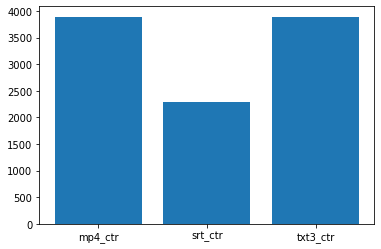

In [37]:
plt.bar(["mp4_ctr","srt_ctr","txt3_ctr"], [mp4_ctr,srt_ctr,txt3_ctr])

## Basic Metadata

In [78]:
COLUMN_LABELS = ['Pull Date','TODO','Lang','Barcode','V No.','File Type']

In [79]:
mp4_df = pd.DataFrame(mp4_files_split, columns=COLUMN_LABELS)
mp4_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,0000,US,00010144,V0,DB.mp4
1,1972-10-06,0000,US,00016471,V0,JS.mp4
2,1972-10-06,0000,US,00015980,V1,JS.mp4
3,1972-09-14,0000,US,00025933,B0,KC.mp4
4,1972-09-01,0000,US,00016359,V0,WR.mp4
...,...,...,...,...,...,...
3943,1980-01-13,0000,US,NA020475,B0,MM.mp4
3944,1980-01-19,0000,US,NA020805,B0,JM.mp4
3945,1980-01-19,0000,US,NA020477,B0,MM.mp4
3946,1969-03-21,0000,US,00010209,V0,DB.mp4


In [84]:
srt_df = pd.DataFrame(srt_files_split, columns=COLUMN_LABELS)
srt_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-10-06,0000,US,00015980,V1,JS.srt
1,1972-10-06,0000,US,00016471,V0,JS.srt
2,1972-09-14,0000,US,00025933,B0,KC.srt
3,1972-09-01,0000,US,00016359,V0,WR.srt
4,1972-06-20,0000,US,00019724,B3,WR.srt
...,...,...,...,...,...,...
2331,1980-01-04,0000,US,NA020268,B0,QG.srt
2332,1980-01-22,0000,US,NA020273,B0,CF.srt
2333,1980-01-14,0000,US,NA020642,B0,DG.srt
2334,1980-01-19,0000,US,NA020805,B0,JM.srt


In [85]:
txt3_df = pd.DataFrame(txt3_files_split, columns=COLUMN_LABELS)
txt3_df

,Pull Date,TODO,Lang,Barcode,V No.,File Type
0,1972-07-01,0000,US,00010144,V0,DB.txt3
1,1972-10-06,0000,US,00015980,V1,JS.txt3
2,1972-10-06,0000,US,00016471,V0,JS.txt3
3,1972-09-14,0000,US,00025933,B0,KC.txt3
4,1972-09-01,0000,US,00016359,V0,WR.txt3
...,...,...,...,...,...,...
3948,1980-01-13,0000,US,NA020475,B0,MM.txt3
3949,1980-01-19,0000,US,NA020805,B0,JM.txt3
3950,1980-01-19,0000,US,NA020477,B0,MM.txt3
3951,1969-03-21,0000,US,00010209,V0,DB.txt3


### V No. Bar Plot

In [95]:
def v_bar_plot(df,title):
    ax = df['V No.'].value_counts().plot(kind='bar', figsize=(15,8), title=title)

    ax.set_xlabel("V No.")
    ax.set_ylabel("Frequence")

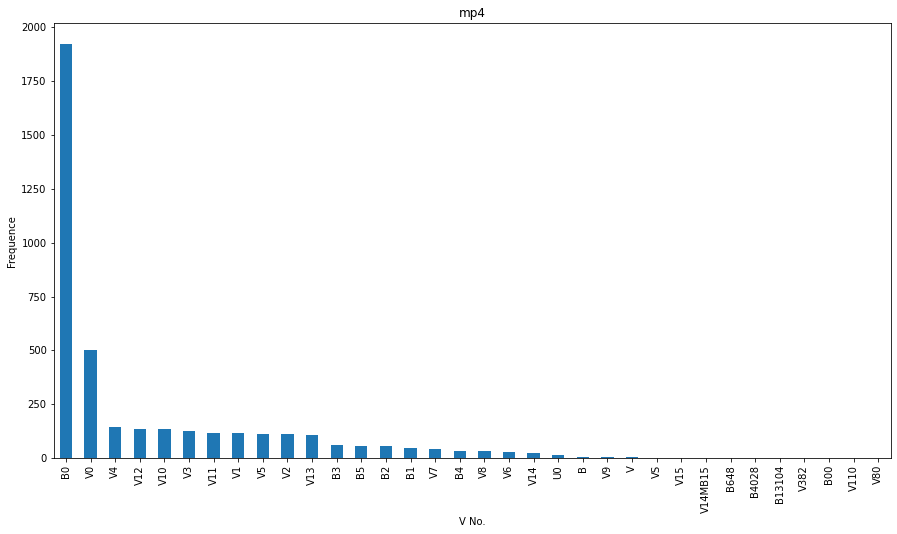

In [96]:
v_bar_plot(mp4_df,'mp4')

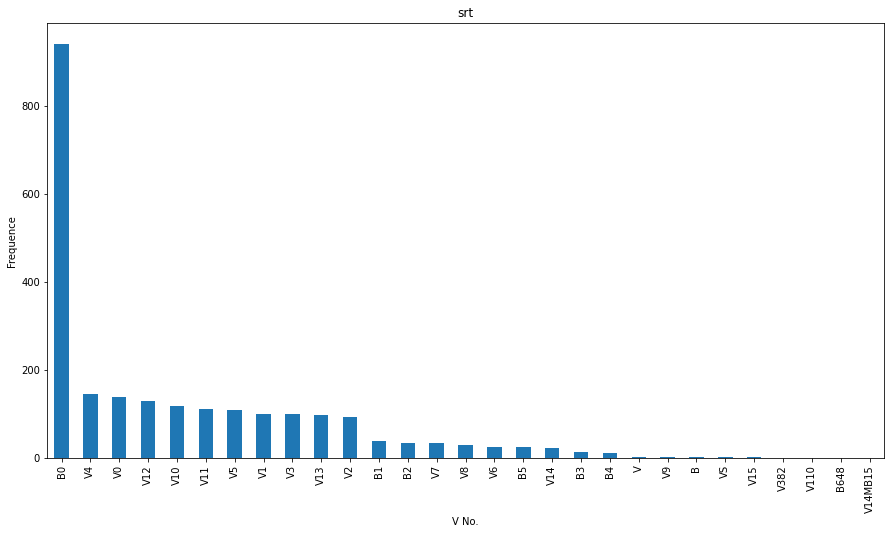

In [97]:
v_bar_plot(srt_df,'srt')

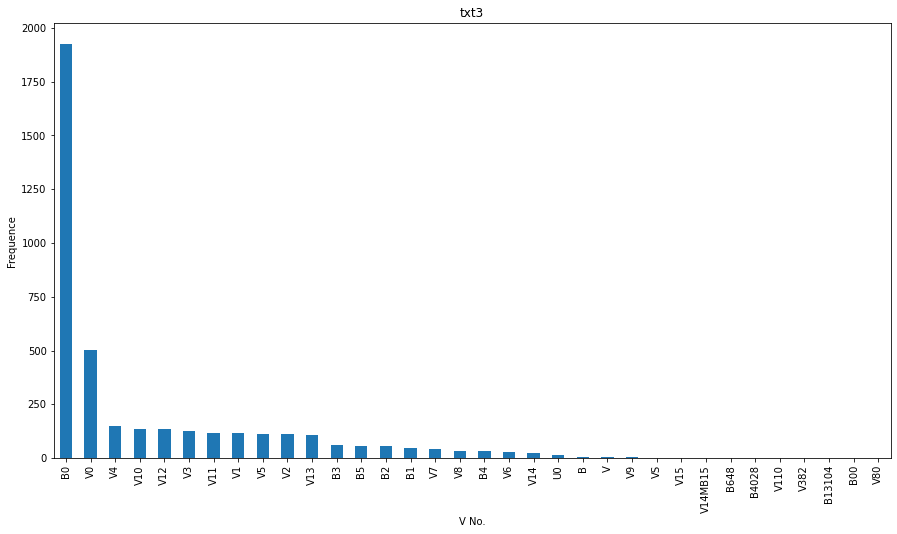

In [98]:
v_bar_plot(txt3_df,'txt3')